This project is intended to build the model which predict the car's price.

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from feature_engine.variable_transformers import PowerTransformer
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [2]:
#Reading the data
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#Checking the head
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Here we are keeping the CarName as BrandName only. Also from data point of view car_ID is not statistically significant to predict the price so we can drop this column.

In [4]:
#Adding BrandName column in dataset
data['BrandName'] = data['CarName'].apply(lambda x : x.split()[0])

In [5]:
#Dropping the CarName column
data.drop(labels=['CarName', 'car_ID'], inplace=True, axis=1)

In [6]:
#Checking the shape
data.shape

(205, 25)

In [7]:
#Seggregate the data to dependent and independent variable
X = data[['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','BrandName']]
y = data['price']

In [8]:
#Methods to seggregate the data into categorical and Numerical column
def data_type(data):
    categorical = []
    numerical = []
    for col in data.columns:
        if(data[col].dtype == 'O'):
            categorical.append(col)
        else:
            numerical.append(col)
    return categorical, numerical

In [9]:
categorical, numerical = data_type(X)

In [10]:
#Checking the missing values in categorical column
data[categorical].isnull().mean()*100

fueltype          0.0
aspiration        0.0
doornumber        0.0
carbody           0.0
drivewheel        0.0
enginelocation    0.0
enginetype        0.0
cylindernumber    0.0
fuelsystem        0.0
BrandName         0.0
dtype: float64

In [11]:
#Checking the missing values in numerical column
data[numerical].isnull().mean()*100

symboling           0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginesize          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
dtype: float64

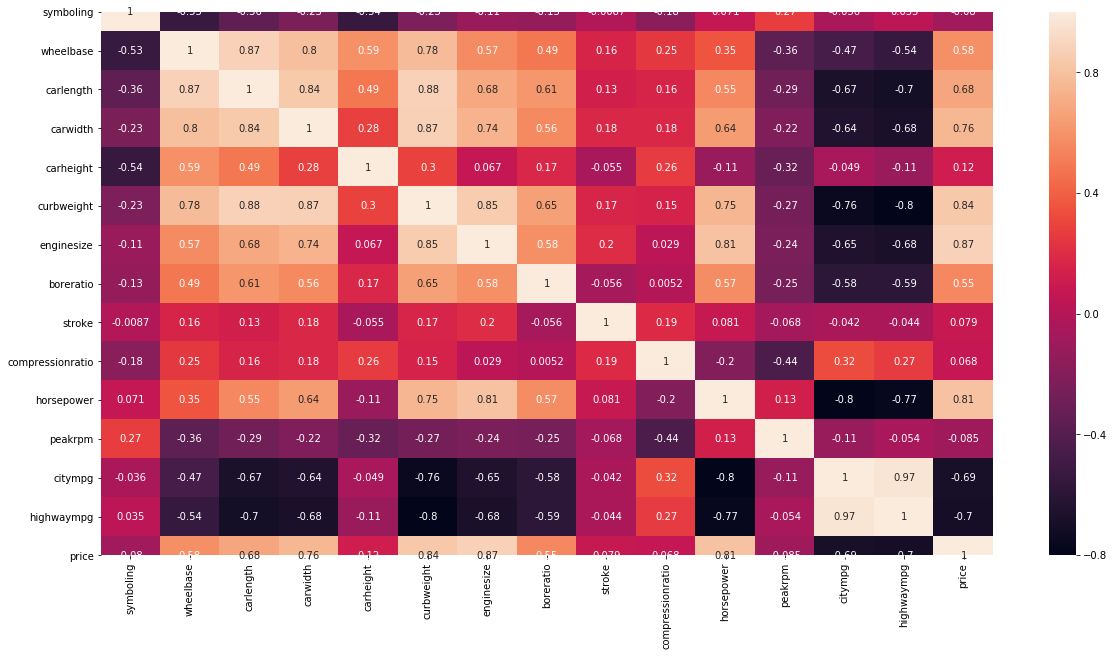

In [12]:
#Visulize the data using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

<Figure size 1440x720 with 0 Axes>

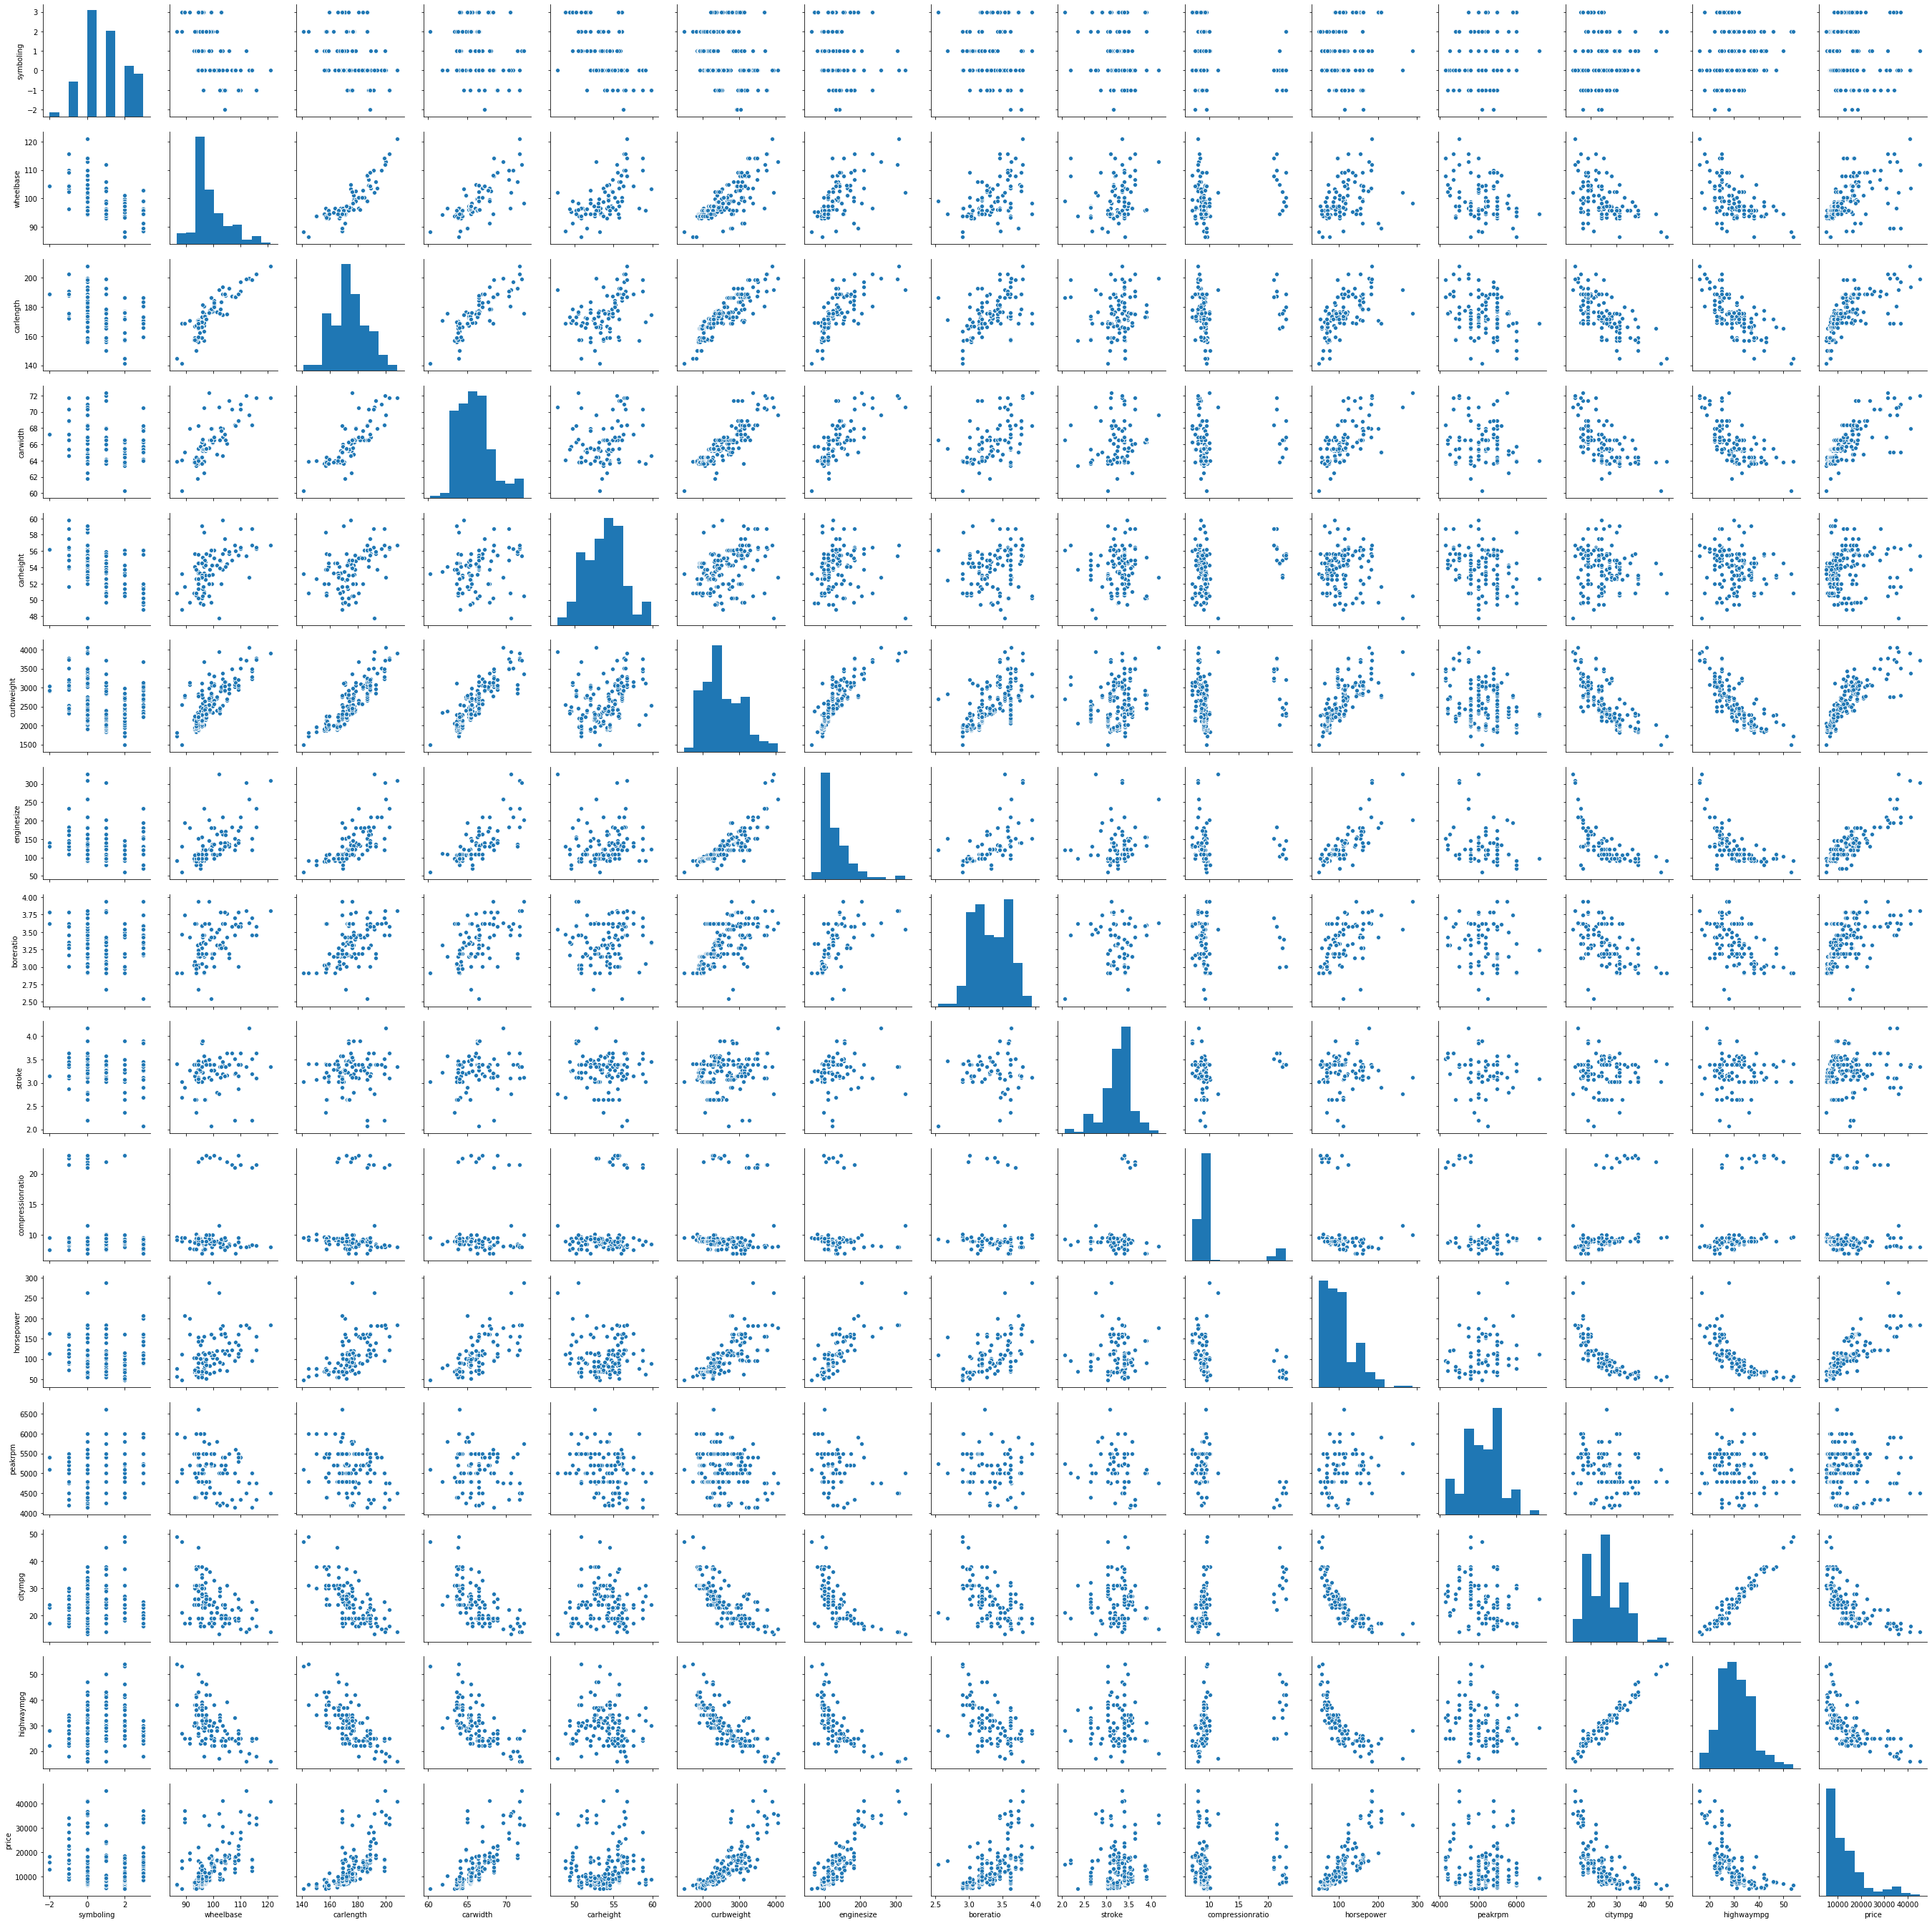

In [13]:
#Visulatise the data with pair plot
plt.figure(figsize=(20,10))
sns.pairplot(data)

In [14]:
#Split the data to training and testing set
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
X_train.shape, X_test.shape

((153, 24), (52, 24))

In [16]:
#Method to check the distribution of the variables
def diagonastic_plot(data, column):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.distplot(data[column])
    plt.subplot(1,2,2)
    probplot(data[column], dist='norm', plot=plt)

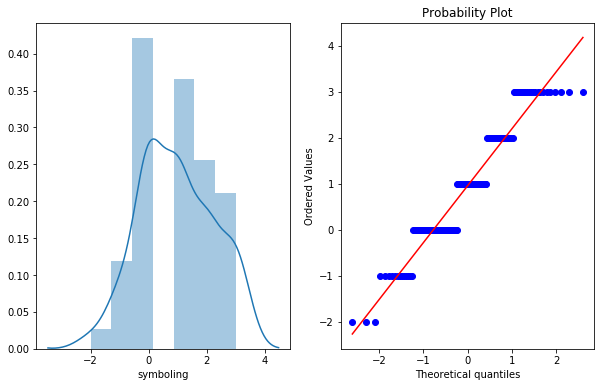

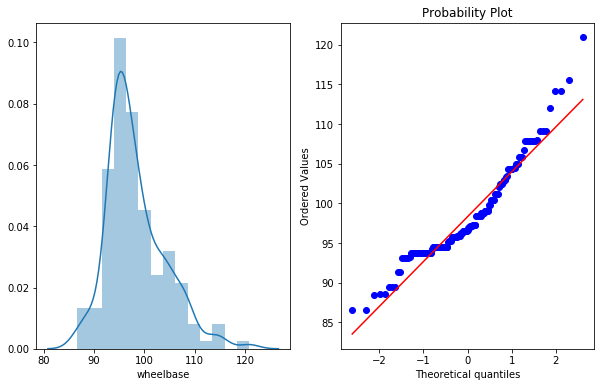

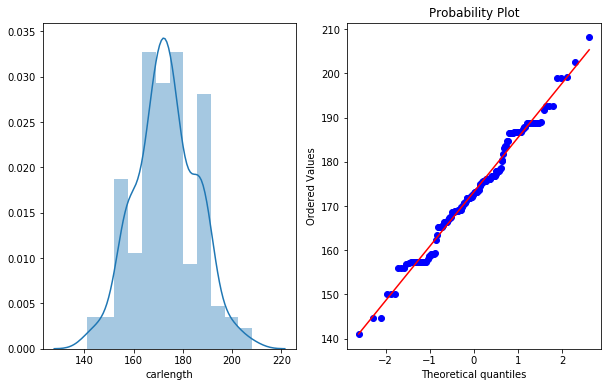

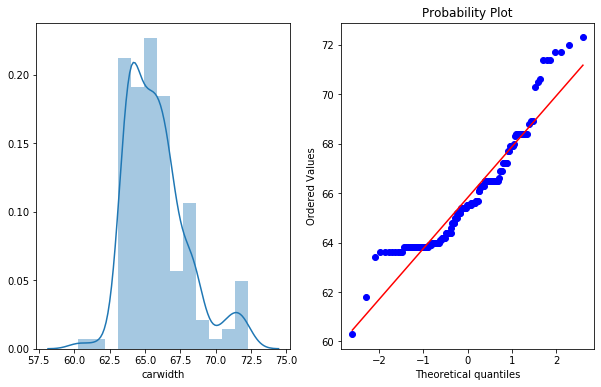

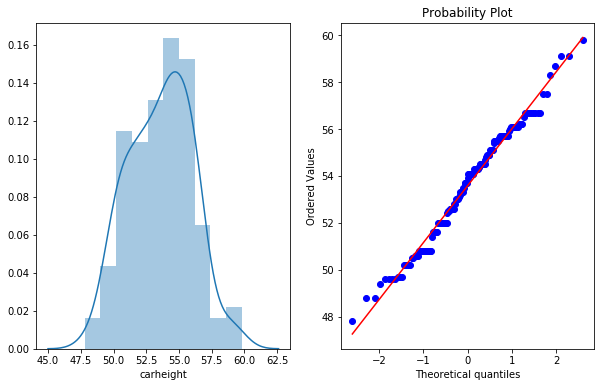

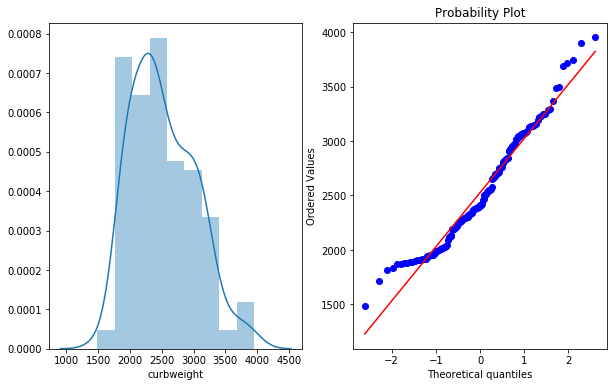

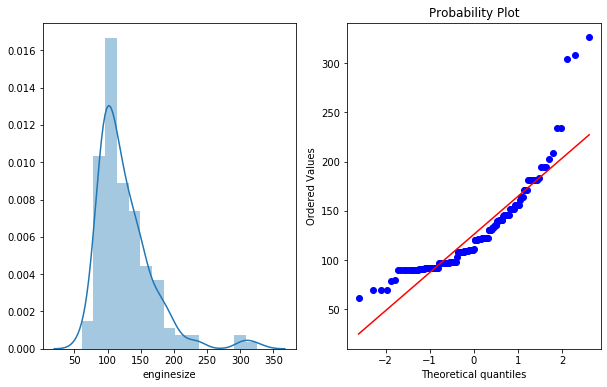

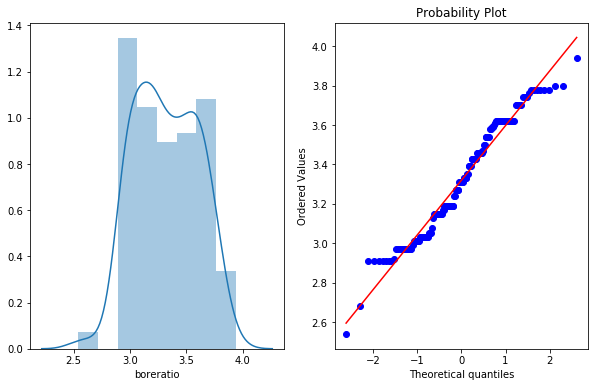

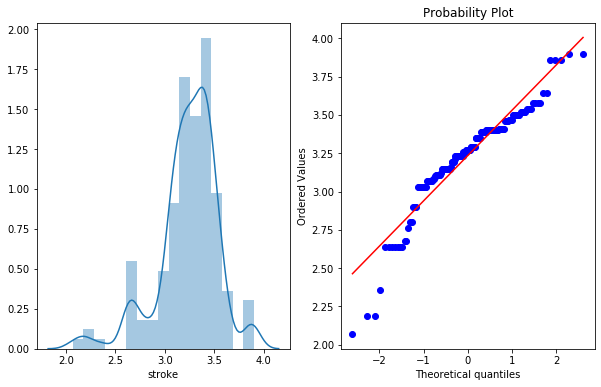

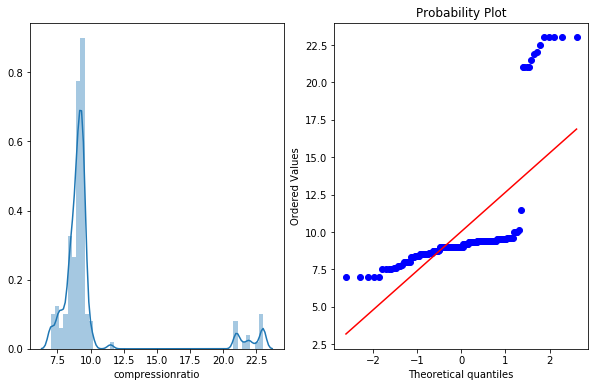

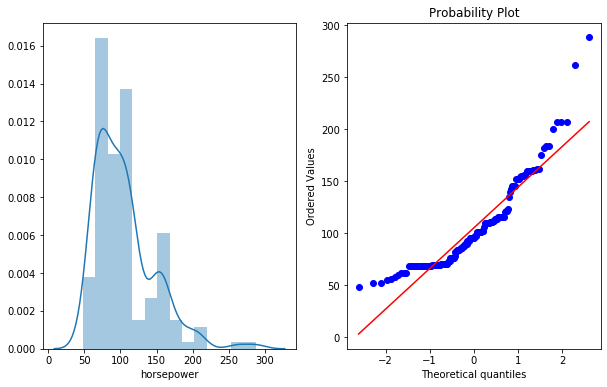

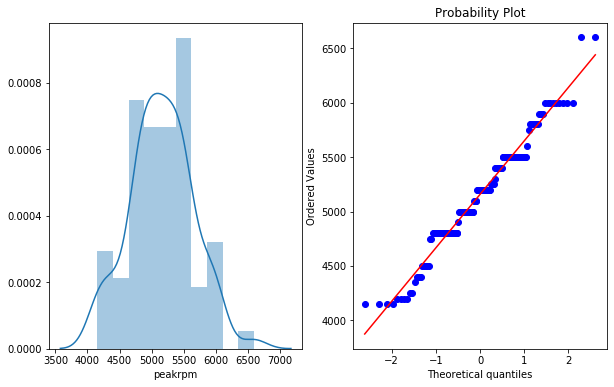

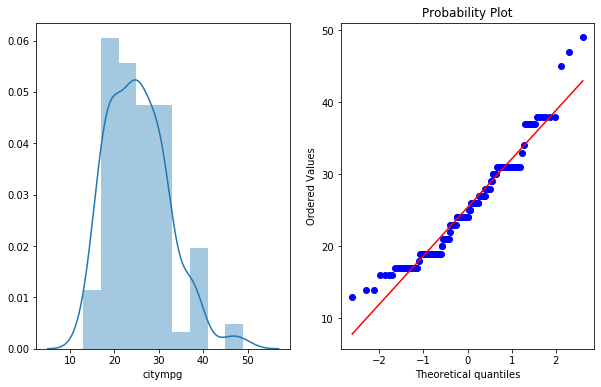

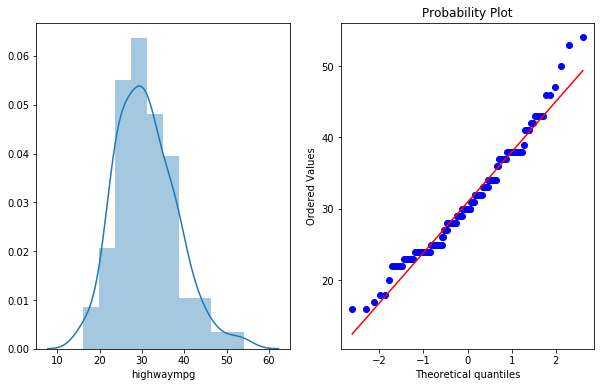

In [17]:
#Checking the distribution of the numerical variables in training set
for col in numerical:
    diagonastic_plot(X_train, col)

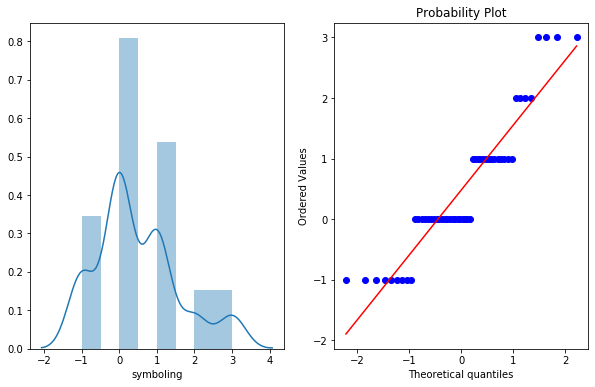

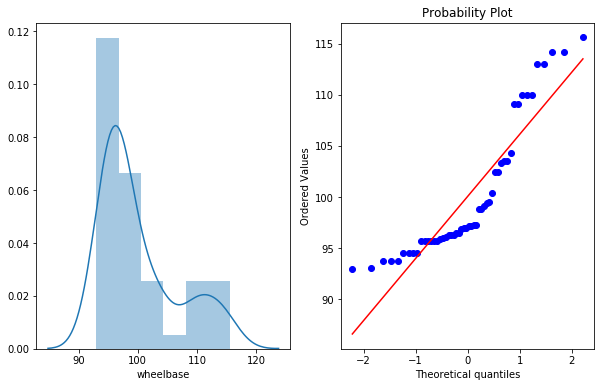

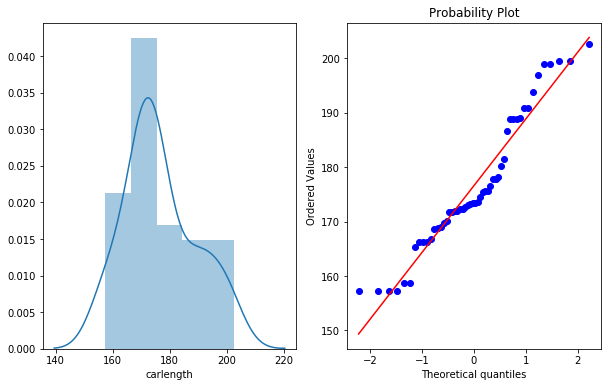

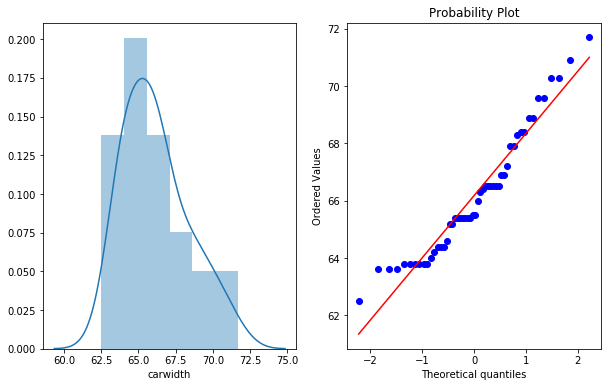

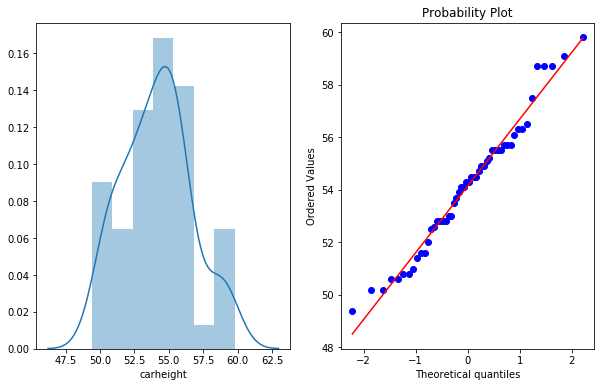

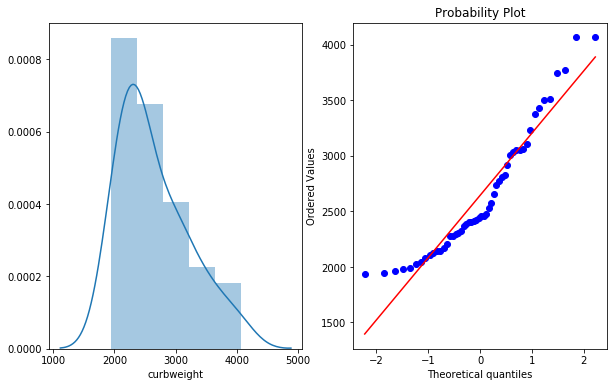

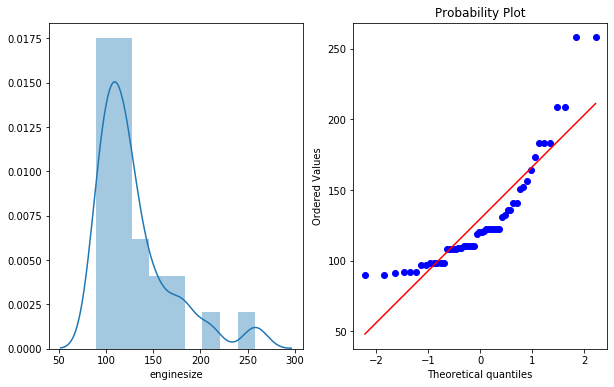

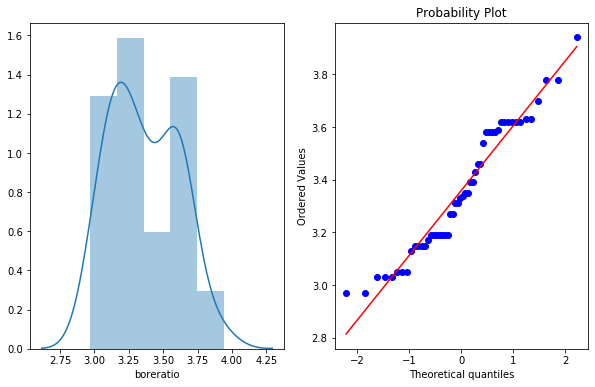

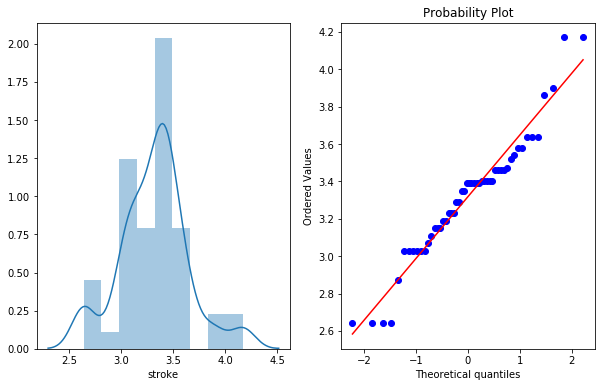

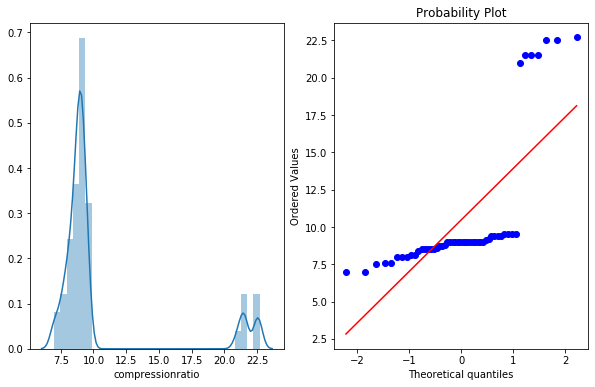

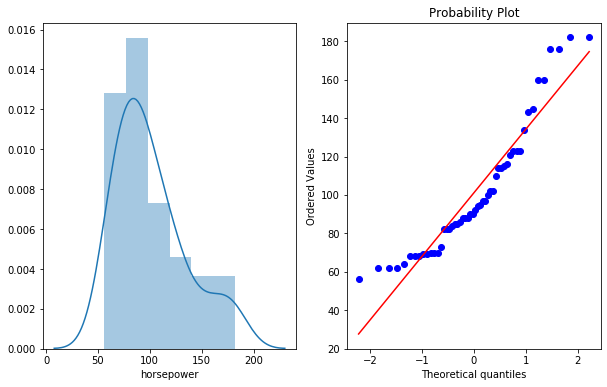

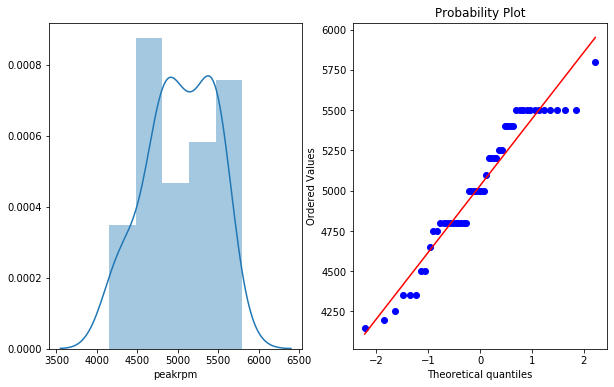

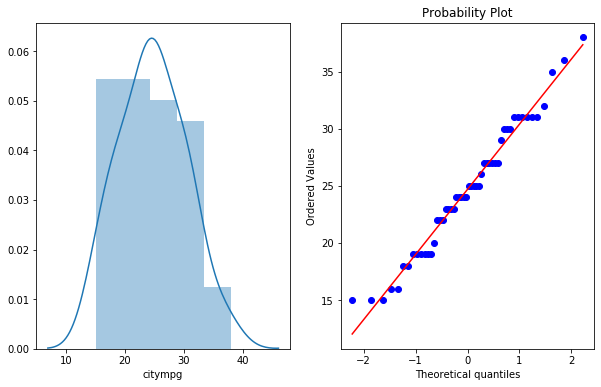

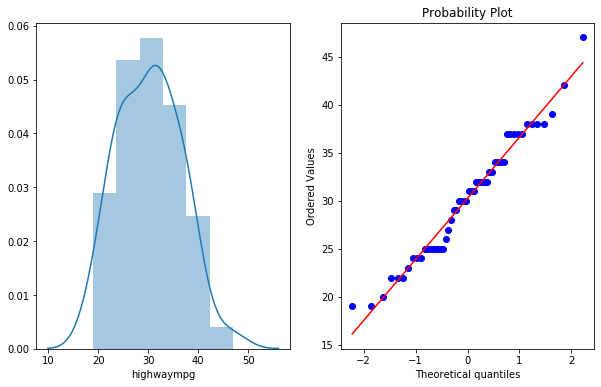

In [18]:
#Checking the distribution of the numerical variables in testing set
for col in numerical:
    diagonastic_plot(X_test, col)

In [19]:
#Method to find the unique elements in categorical columns
def check_unique(data, col_list):
    my_dict = {}
    for col in col_list:
        my_dict[col] = data[col].unique()
    return my_dict

In [20]:
#Checking unique observation in training set
check_unique(X_train, categorical)

{'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['turbo', 'std'], dtype=object),
 'doornumber': array(['four', 'two'], dtype=object),
 'carbody': array(['wagon', 'sedan', 'hatchback', 'hardtop', 'convertible'],
       dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'enginetype': array(['ohc', 'ohcv', 'l', 'dohc', 'ohcf', 'rotor', 'dohcv'], dtype=object),
 'cylindernumber': array(['four', 'twelve', 'six', 'three', 'two', 'five', 'eight'],
       dtype=object),
 'fuelsystem': array(['mpfi', '2bbl', 'idi', '1bbl', 'mfi', '4bbl', 'spdi'], dtype=object),
 'BrandName': array(['volvo', 'mazda', 'isuzu', 'plymouth', 'volkswagen', 'toyota',
        'jaguar', 'nissan', 'dodge', 'peugeot', 'saab', 'honda',
        'chevrolet', 'vw', 'porsche', 'subaru', 'porcshce', 'bmw', 'audi',
        'mitsubishi', 'maxda', 'buick', 'vokswagen', 'alfa-romero',
        'renault', 'toyouta', 'mercury',

In [21]:
#Checking unique observation in testing set
check_unique(X_test, categorical)

{'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['four', 'two'], dtype=object),
 'carbody': array(['sedan', 'hatchback', 'wagon'], dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front'], dtype=object),
 'enginetype': array(['ohc', 'dohc', 'ohcf', 'ohcv', 'l'], dtype=object),
 'cylindernumber': array(['six', 'four', 'five'], dtype=object),
 'fuelsystem': array(['mpfi', '2bbl', 'idi', 'spdi', 'spfi', '1bbl'], dtype=object),
 'BrandName': array(['bmw', 'nissan', 'honda', 'buick', 'mitsubishi', 'toyota', 'dodge',
        'renault', 'jaguar', 'porsche', 'subaru', 'audi', 'mazda',
        'plymouth', 'volkswagen', 'volvo', 'isuzu', 'peugeot', 'saab'],
       dtype=object)}

In [22]:
#Method to check the number of unique values
def check_nunique(data, col_list):
    my_dict = {}
    for col in col_list:
        my_dict[col] = data[col].nunique()
    return my_dict

In [23]:
#Checking number of unique observation in training set
check_nunique(X_train, categorical)

{'fueltype': 2,
 'aspiration': 2,
 'doornumber': 2,
 'carbody': 5,
 'drivewheel': 3,
 'enginelocation': 2,
 'enginetype': 7,
 'cylindernumber': 7,
 'fuelsystem': 7,
 'BrandName': 28}

In [24]:
#Checking number of unique observation in testing set
check_nunique(X_test, categorical)

{'fueltype': 2,
 'aspiration': 2,
 'doornumber': 2,
 'carbody': 3,
 'drivewheel': 3,
 'enginelocation': 1,
 'enginetype': 5,
 'cylindernumber': 3,
 'fuelsystem': 6,
 'BrandName': 19}

In [25]:
#Encode the categorical variable
encoder = OneHotCategoricalEncoder(variables=categorical, drop_last=True)

In [26]:
#Fit the data
encoder.fit(X_train)

OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                         variables=['fueltype', 'aspiration', 'doornumber',
                                    'carbody', 'drivewheel', 'enginelocation',
                                    'enginetype', 'cylindernumber',
                                    'fuelsystem', 'BrandName'])

In [27]:
#Transform the variable
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
#Applying the model
regressor = Ridge(alpha=0.5, copy_X=True, fit_intercept=False, max_iter=500,
      normalize=False, random_state=None, solver='auto', tol=0.001)
regressor.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=False, max_iter=500,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
#Predict the test set result
y_pred = regressor.predict(X_test)

In [30]:
#Evaluate the model performance
r2 = r2_score(y_test, y_pred)

In [31]:
print(r2)

0.8922399149410885


In [32]:
#Applying RandomizedSearchcv for best parameters
params = {
    'alpha' : [0.1,0.5,1.0,1.5,2.0],
    'fit_intercept' : [True,False],
    'normalize': [True,False],
    'copy_X' : [True,False],
     'max_iter' : [100,500,1000,1500], 
     'tol' : [0.1,0.01,0.001], 
      'solver': ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

In [33]:
cv = RandomizedSearchCV(estimator=regressor, param_distributions=params,n_iter=10,
                   scoring='r2',cv=10, n_jobs=-1,return_train_score=True)

In [34]:
#Fit the data
cv.fit(np.ascontiguousarray(X_train), y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=Ridge(alpha=0.5, copy_X=True, fit_intercept=False,
                                   max_iter=500, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
                                        'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'max_iter': [100, 500, 1000, 1500],
                                        'normalize': [True, False],
                                        'solver': ['auto', 'cholesky', 'lsqr',
                                                   'sparse_cg', 'sag', 'saga'],
                                        'tol': [0.1, 0.01, 0.001]},
                   pre_dispatch='2*n_jobs'

In [35]:
cv.best_score_

0.8710091034902345

In [36]:
cv.best_params_

{'tol': 0.001,
 'solver': 'auto',
 'normalize': True,
 'max_iter': 500,
 'fit_intercept': False,
 'copy_X': False,
 'alpha': 1.0}